In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import calendar

from statsmodels.tsa.holtwinters import ExponentialSmoothing, SimpleExpSmoothing, Holt

import statsmodels.api as sm
import statsmodels.tsa.api as smt
import statsmodels.formula.api as smf

In [2]:
como = pd.read_csv('Project - 3 - India_Key_Commodities_Retail_Prices_1997_2015.csv')
como.head()

,Date,Centre,Commodity,Price per Kg,Region,Country
0,25-11-1997,LUCKNOW,Tur/Arhar Dal,15.0,NORTH,INDIA
1,25-11-1997,BHOPAL,Tur/Arhar Dal,18.0,WEST,INDIA
2,25-11-1997,JAIPUR,Tur/Arhar Dal,20.0,WEST,INDIA
3,25-11-1997,SHIMLA,Tur/Arhar Dal,21.5,NORTH,INDIA
4,25-11-1997,AHMEDABAD,Tur/Arhar Dal,21.5,WEST,INDIA


In [3]:
como.shape

(846672, 6)

In [4]:
como.Region.value_counts()

NORTH         230738
SOUTH         187864
WEST          182292
EAST          134771
NORTH EAST    111007
Name: Region, dtype: int64

In [5]:
como.Centre.value_counts()

DELHI              29879
CHENNAI            29389
HYDERABAD          29313
T.PURAM            29281
MUMBAI             28944
JAIPUR             28553
BHUBANESHWAR       28543
KOLKATA            28486
BENGALURU          28395
AHMEDABAD          28151
BHOPAL             27737
LUCKNOW            27519
SHIMLA             26759
SHILLONG           26249
PATNA              25912
GUWAHATI           25748
AGARTALA           24860
AIZWAL             21542
RAIPUR             16403
DEHRADUN           15171
JAMMU              15051
AMRITSAR           14915
CHANDIGARH         14577
LUDHIANA           13474
RANCHI             12066
SRINAGAR           11056
RAJKOT             10535
VIJAYWADA          10402
DINDIGUL           10117
THIRUCHIRAPALLI     9868
                   ...  
VARANASI            8032
BHAGALPUR           7630
PUDUCHERRY          6080
DIMAPUR             6005
BATHINDA            5880
JODHPUR             5386
KOZHIKODE           5024
JABALPUR            4642
GWALIOR             4533


In [6]:
como.Commodity.value_counts()

Onion                     115991
Rice                      115370
Tea Loose                 114495
Tur/Arhar Dal             114224
Sugar                     106953
Salt Pack (Iodised)        93451
Milk                       85848
Tomato                     54578
Sunflower Oil (Packed)     45762
Name: Commodity, dtype: int64

In [7]:
como.Commodity.replace('Tur/Arhar Dal','TurArhar Dal',inplace=True)
como.Centre.replace('T.PURAM','TPURAM',inplace=True)

In [8]:
date = [pd.datetime.strptime(d,'%d-%m-%Y') for d in como.Date]
como['Timeindex'] = date
como.head()

,Date,Centre,Commodity,Price per Kg,Region,Country,Timeindex
0,25-11-1997,LUCKNOW,TurArhar Dal,15.0,NORTH,INDIA,1997-11-25
1,25-11-1997,BHOPAL,TurArhar Dal,18.0,WEST,INDIA,1997-11-25
2,25-11-1997,JAIPUR,TurArhar Dal,20.0,WEST,INDIA,1997-11-25
3,25-11-1997,SHIMLA,TurArhar Dal,21.5,NORTH,INDIA,1997-11-25
4,25-11-1997,AHMEDABAD,TurArhar Dal,21.5,WEST,INDIA,1997-11-25


In [9]:
como.tail()

,Date,Centre,Commodity,Price per Kg,Region,Country,Timeindex
846667,15-05-1998,LUCKNOW,Rice,6.5,NORTH,INDIA,1998-05-15
846668,18-05-1998,LUCKNOW,Rice,6.5,NORTH,INDIA,1998-05-18
846669,26-05-1998,LUCKNOW,Rice,6.5,NORTH,INDIA,1998-05-26
846670,27-05-1998,LUCKNOW,Rice,6.5,NORTH,INDIA,1998-05-27
846671,28-05-1998,LUCKNOW,Rice,6.5,NORTH,INDIA,1998-05-28


In [9]:
como['Month-year'] = como.Timeindex.dt.to_period('M')
como.head()

,Date,Centre,Commodity,Price per Kg,Region,Country,Timeindex,Month-year
0,25-11-1997,LUCKNOW,Tur/Arhar Dal,15.0,NORTH,INDIA,1997-11-25,1997-11
1,25-11-1997,BHOPAL,Tur/Arhar Dal,18.0,WEST,INDIA,1997-11-25,1997-11
2,25-11-1997,JAIPUR,Tur/Arhar Dal,20.0,WEST,INDIA,1997-11-25,1997-11
3,25-11-1997,SHIMLA,Tur/Arhar Dal,21.5,NORTH,INDIA,1997-11-25,1997-11
4,25-11-1997,AHMEDABAD,Tur/Arhar Dal,21.5,WEST,INDIA,1997-11-25,1997-11


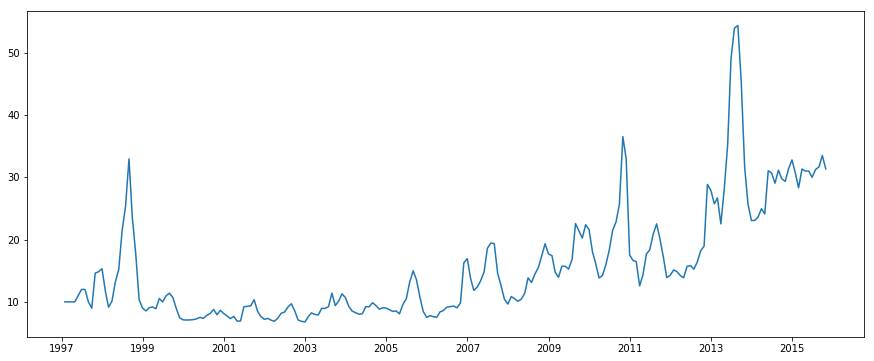

In [10]:
sample = como[(como.Commodity == 'Onion') & (como.Centre=='DELHI')]
sample = sample.groupby(['Month-year']).mean()
sample.reset_index(inplace=True)
sample.sort_values(by=['Month-year'],inplace=True)
date = pd.date_range(start='1997-01-01', periods=len(sample), freq='M')
sample['Timeindex'] = date
plt.figure(figsize=(15,6))
plt.plot(sample['Timeindex'], sample['Price per Kg'])
plt.show()

In [11]:
sample.head()

,Month-year,Price per Kg,Timeindex
0,1997-01,10.0,1997-01-31
1,1997-02,10.0,1997-02-28
2,1997-03,10.0,1997-03-31
3,1997-04,10.0,1997-04-30
4,1997-05,11.0,1997-05-31


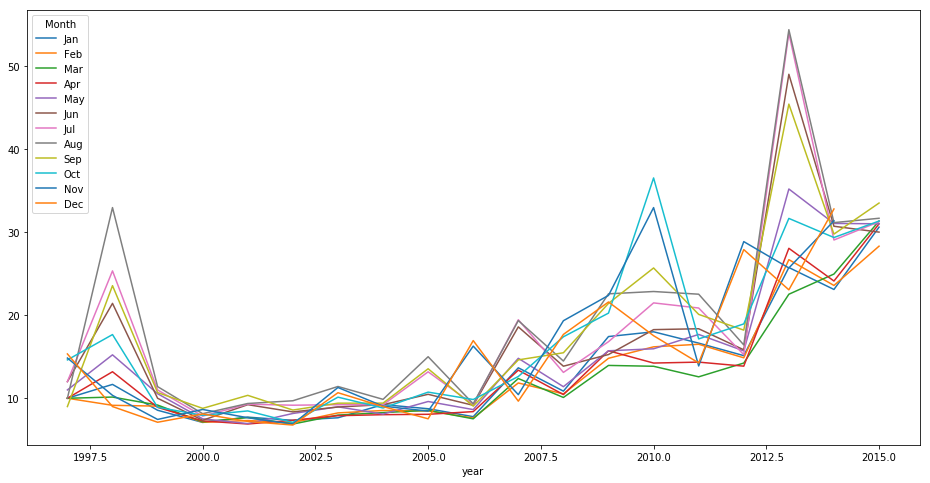

In [7]:
month = sample.Timeindex.dt.month
monthabb = [calendar.month_abbr[i] for i in range(1,13)]
sample['Month'] = [calendar.month_abbr[i] for i in month]
sample['year'] = sample.Timeindex.dt.year
pivotsample=pd.pivot_table(sample,values='Price per Kg',columns='Month',index='year',aggfunc='mean')
pivotsample=pivotsample.reindex_axis(monthabb,axis=1)
pivotsample.plot(figsize=(16,8))
plt.show()

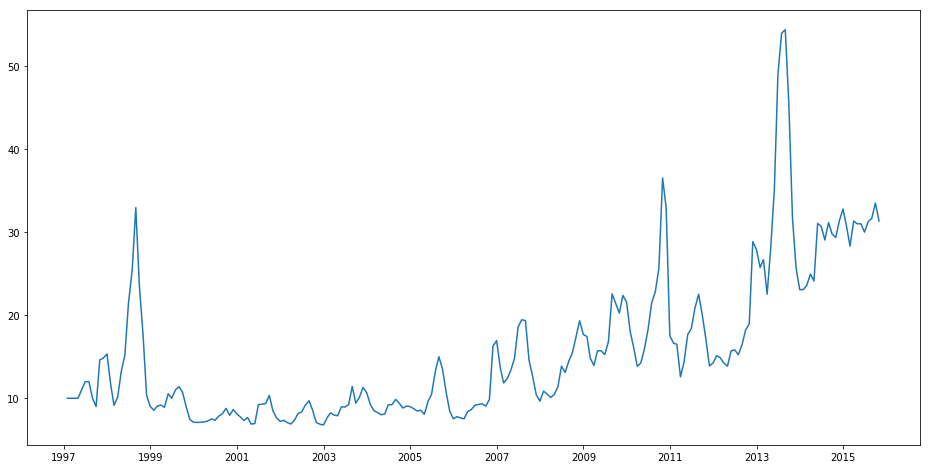

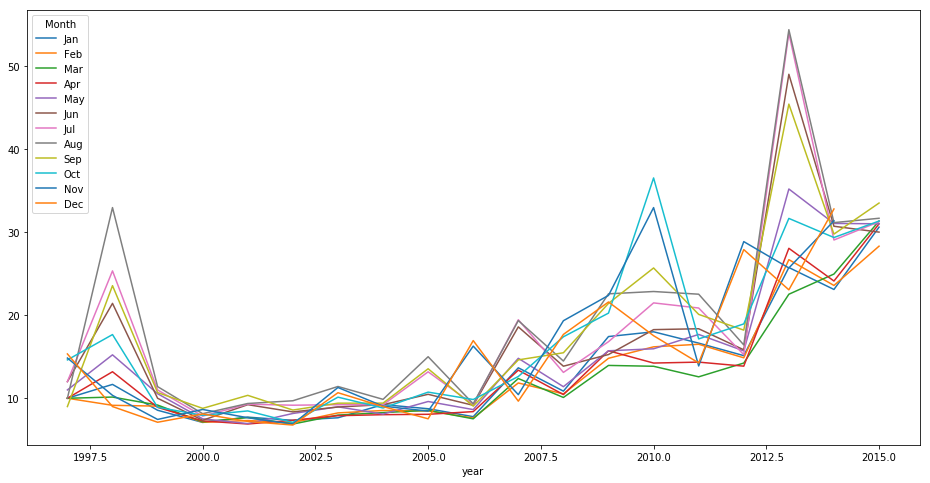

In [8]:
fig, axes = plt.subplots(1,1)
fig.set_figwidth(16)
fig.set_figheight(8)
plt.plot(sample['Timeindex'], sample['Price per Kg'])
plt.savefig('mid')
pivotsample.plot(figsize=(16,8))
plt.savefig('midn')
plt.show()

In [9]:
center = como.Centre.unique()
commodity = como.Commodity.unique()

### Code to create graphs

for i in center:
for j in commodity:
        sample = como[(como.Commodity == j) & (como.Centre==i)]
        sample = sample.groupby(['Month-year']).mean()
        sample.reset_index(inplace=True)
        sample.sort_values(by=['Month-year'],inplace=True)
        date = pd.date_range(start='1997-01-01', periods=len(sample), freq='M')
        sample['Timeindex'] = date
        
        if sample.empty:
            print(i,j,' is null')
        else:
            month = sample.Timeindex.dt.month
            monthabb = [calendar.month_abbr[i] for i in range(1,13)]
            sample['Month'] = [calendar.month_abbr[i] for i in month]
            sample['year'] = sample.Timeindex.dt.year
            pivotsample=pd.pivot_table(sample,values='Price per Kg',columns='Month',index='year',aggfunc='mean')
            pivotsample=pivotsample.reindex_axis(monthabb,axis=1)
            
            fig, axes = plt.subplots(1,1)
            fig.set_figwidth(16)
            fig.set_figheight(8)
            plt.plot(sample['Timeindex'], sample['Price per Kg'])
            a='./img/full/'+i+j
            plt.savefig(a)
            pivotsample.plot(figsize=(16,8))
            b='./img/full/'+i+j+'S'
            plt.savefig(b)
            plt.show()

In [14]:
train = sample.head(len(sample)-22)
test = sample.tail(22)

In [49]:
train.head(13)

,Month-year,Price per Kg,Timeindex,Month,year
0,1997-01,10.000000,1997-01-31,Jan,1997
1,1997-02,10.000000,1997-02-28,Feb,1997
2,1997-03,10.000000,1997-03-31,Mar,1997
3,1997-04,10.000000,1997-04-30,Apr,1997
4,1997-05,11.000000,1997-05-31,May,1997
5,1997-08,12.000000,1997-06-30,Jun,1997
6,1997-09,12.000000,1997-07-31,Jul,1997
7,1997-10,10.000000,1997-08-31,Aug,1997
8,1997-11,9.000000,1997-09-30,Sep,1997
9,1997-12,14.615385,1997-10-31,Oct,1997


In [34]:
def mape(y,ypred):
    per = round(sum(np.abs(y-ypred)/y)*(100/len(y)),3)
    return str(per) + ' %'

In [51]:
samplemodel = ExponentialSmoothing(np.asarray(train['Price per Kg']), seasonal_periods=12, seasonal='add') 
samplemod = samplemodel.fit(smoothing_level=0.1,smoothing_slope=0.1,smoothing_seasonal=0.1,optimized=False)
test['forecast'] = samplemod.forecast(len(test))
train['forecast']=samplemod.fittedvalues

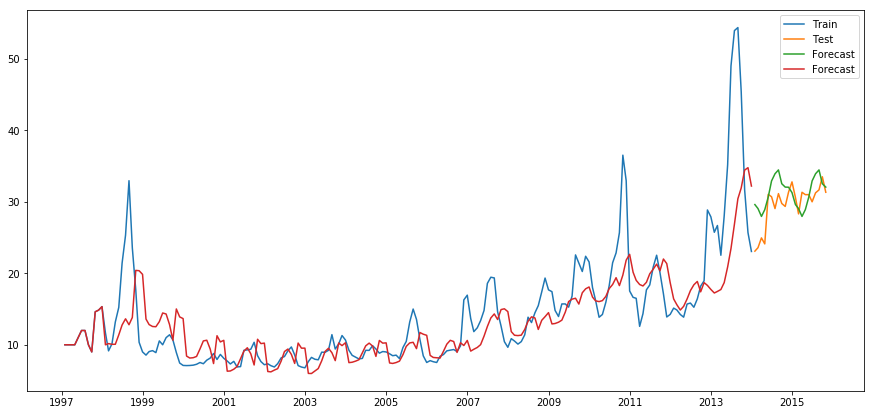

In [52]:
plt.figure(figsize=(15,7))
plt.plot(train.Timeindex,train['Price per Kg'], label='Train')
plt.plot(test.Timeindex,test['Price per Kg'], label='Test')
plt.plot(test.Timeindex,test.forecast, label='Forecast')
plt.plot(train.Timeindex, train.forecast, label='Forecast')
plt.legend()
plt.show()

In [35]:
mape(test['Price per Kg'],test.forecast)

'9.148 %'

In [53]:
mape(train['Price per Kg'], train.forecast)

'20.188 %'

In [ ]:
sample

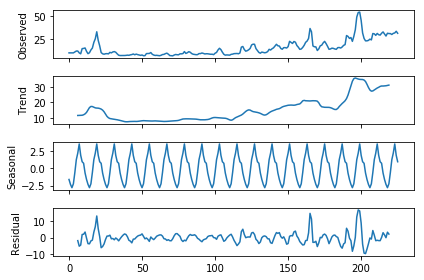

In [59]:
sampledecomp = sm.tsa.seasonal_decompose(sample['Price per Kg'], freq=12,model='additive')
sampledecomp.plot()
plt.show()

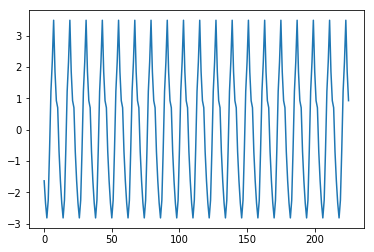

In [61]:
sampledecomp.seasonal.plot()

In [1]:
dal

NameError: name 'dal' is not defined